# Using rapidfuzz to extract affiliatuons from AER

First the JSON output file from tezseract is read in and made into a useable dataframe

In [21]:
#Importing the libraries
import json
import pandas as pd
from rapidfuzz import process

# Import JSON file
f = open('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Tesseract affiliation output/AER/AER_aff_output_1971_2010.json')
json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'AER'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorsNo = len(author_list)
    stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

    Reference_Data_List.append({'Journal_Name' : Journal_Name,
    'Authors_count' : authorsNo, 
    'Article_ID' : Article_ID, 'content_type' : content_type,
    'stable_url' : stable_url, 
    'Ref_type': Ref_type,  'ref_string':ref_string })

AER_aff_ref_output_1940_2010 = pd.DataFrame.from_records(Reference_Data_List)     
AER_aff_ref_output_1940_2010.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/Working files/AER_aff_ref_output_1940_2010.xlsx')        

Next the Unique list of universities is read in, this is used as a database to check the affiliton string against using rapidfuzz. 

In [22]:
affs = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/University list/Unique Universities.xlsx')
print(affs.shape)

#testdata = AER_1940_2010.loc[0:20].reset_index(drop = True)
testdata = AER_aff_ref_output_1940_2010

for i in range(len(affs)):
    #Replaceing title case and stripping leading space
    affs.iat[i,0] = affs.iat[i,0].strip().title()
Affiliation_choices = affs['Affilliation'].values.tolist()

for i in range(len(testdata)):
    #Replaceing title case and stripping leading space
    testdata.iat[i,6] = testdata.iat[i,6].strip().title()


(683, 5)


Next the test data is split line by line and parsed through the fuzzy matching library rapid fuzz.  Using the process.extract function a list of variables from a data frame being the unique universities is checked to see if there is a match in the input line from tesseract.

In [23]:
# For loop to iterate through lines in the input data and check to see if this exists in the created data base. 
# If it exists it is appended to a dataframe as the next affiliton for that paper
for i in range(len(testdata)):
    split = testdata.iat[i,6].split('\n\n')
    split_len = len(testdata.iat[i,6].split('\n\n'))
    affiliations = []
    count_no_aff = 0
    for j in range(split_len):
        #print(i)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) > 0:
            affiliations = affiliations + process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) == 0:
            count_no_aff = count_no_aff+1

        if count_no_aff == 8:
            break
        if j == split_len:
            break

    print("Length = " , len(affiliations), ", Number = ",i)
    if len(affiliations) == 0:
        testdata.loc[i,['Missing aff']] = "Missing"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 1:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 2:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 3:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 4:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 5:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
        print(affiliations)
    elif len(affiliations) == 6:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 7:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 8:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 9:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 10:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 11:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 12:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['aff12']] = affiliations[11][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    else: 
        testdata.loc[i,['Missing aff']] = "More than 12"


Length =  0 , Number =  0
Length =  0 , Number =  1
Length =  0 , Number =  2
Length =  1 , Number =  3
Length =  0 , Number =  4
Length =  0 , Number =  5
Length =  0 , Number =  6
Length =  0 , Number =  7
Length =  1 , Number =  8
Length =  2 , Number =  9
Length =  1 , Number =  10
Length =  0 , Number =  11
Length =  0 , Number =  12
Length =  0 , Number =  13
Length =  0 , Number =  14
Length =  0 , Number =  15
Length =  0 , Number =  16
Length =  0 , Number =  17
Length =  0 , Number =  18
Length =  1 , Number =  19
Length =  0 , Number =  20
Length =  0 , Number =  21
Length =  1 , Number =  22
Length =  2 , Number =  23
Length =  1 , Number =  24
Length =  0 , Number =  25
Length =  0 , Number =  26
Length =  0 , Number =  27
Length =  0 , Number =  28
Length =  0 , Number =  29
Length =  1 , Number =  30
Length =  0 , Number =  31
Length =  0 , Number =  32
Length =  0 , Number =  33
Length =  0 , Number =  34
Length =  0 , Number =  35
Length =  0 , Number =  36
Length =  0

In [24]:
# Excel output to get an overview of the data
testdata.head
testdata.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/AER/Test files/AER_aff_ref_output_1940_2010_affs_out.xlsx') 

In [25]:
# This is taking a dataframe with multiple affilitaion columns and melting these to be all one column.
melted = testdata.melt(id_vars= 'Article_ID', value_vars=['aff1','aff2','aff3','aff4','aff5','aff6','aff7','aff8','aff9']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
print(melted.head())

   Article_ID Aff number                            Affiliation
3     1805768       aff1                  University Of Chicago
8     1805773       aff1                University Of Minnesota
9     1805774       aff1                        Yale University
10    1805775       aff1  Massachusetts Institute Of Technology
19    1805784       aff1           University Of South Carolina


In [26]:
#Reading in the master file and correctly formatting the article ID to match back onto the meltef file
AER_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Master lists/Processed/AER_processed.xlsx')

for i in range(len(AER_master)):
    AER_master.loc[i,['Article_ID']] = AER_master.loc[i,['stable_url']].to_string().rsplit('/',1)[-1]

AER_master_condenced  = AER_master[['Article_ID','year']]
AER_master_condenced.head()

,Article_ID,year
0,26848477,2019.0
1,26848478,2019.0
2,26848479,2019.0
3,26848480,2019.0
4,26848481,2019.0


In [27]:
# MErging the msterfile onto the new melted file to get additional data
AER_melted_master = melted.merge(AER_master_condenced, how = 'left', on = 'Article_ID')
AER_melted_master = AER_melted_master.sort_values(by=['year'])
AER_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/AER/AER_melted_master.xlsx') 
AER_melted_master.head()

,Article_ID,Aff number,Affiliation,year
653,1817012,aff1,Resources For The Future,1971.0
654,1817021,aff1,National Bureau Of Economic Research,1971.0
655,1817022,aff1,National Bureau Of Economic Research,1971.0
656,1817023,aff1,National Bureau Of Economic Research,1971.0
657,1817024,aff1,National Bureau Of Economic Research,1971.0


In [28]:
# Counting the number of times a certain affiliton occurs
AER_melted_master['aff_cum_counts'] = AER_melted_master.groupby(['Affiliation']).cumcount()+1
AER_melted_master.head()
AER_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/AER/Test files/AER_melted_master_aff_count.xlsx') 

In [29]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = AER_melted_master.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
1645,29730003,aff1,Harvard University,2008.0,121
1635,25592402,aff1,University Of Chicago,2009.0,110
2174,30034491,aff2,Columbia University,2007.0,102
1626,27804974,aff1,Massachusetts Institute Of Technology,2010.0,98
1650,30034600,aff1,Stanford University,2007.0,93
1622,27871251,aff1,National Bureau Of Economic Research,2010.0,79
1639,25592436,aff1,"University Of California, Berkeley",2009.0,73
1633,25592474,aff1,Princeton University,2009.0,70
1673,4132798,aff1,University Of Michigan,2005.0,57
1697,3592782,aff1,Yale University,2004.0,47


    Article_ID Aff number                           Affiliation    year  \
653    1817012       aff1              Resources For The Future  1971.0   
654    1817021       aff1  National Bureau Of Economic Research  1971.0   
655    1817022       aff1  National Bureau Of Economic Research  1971.0   
656    1817023       aff1  National Bureau Of Economic Research  1971.0   
657    1817024       aff1  National Bureau Of Economic Research  1971.0   

     aff_cum_counts  
653               1  
654               1  
655               2  
656               3  
657               4  


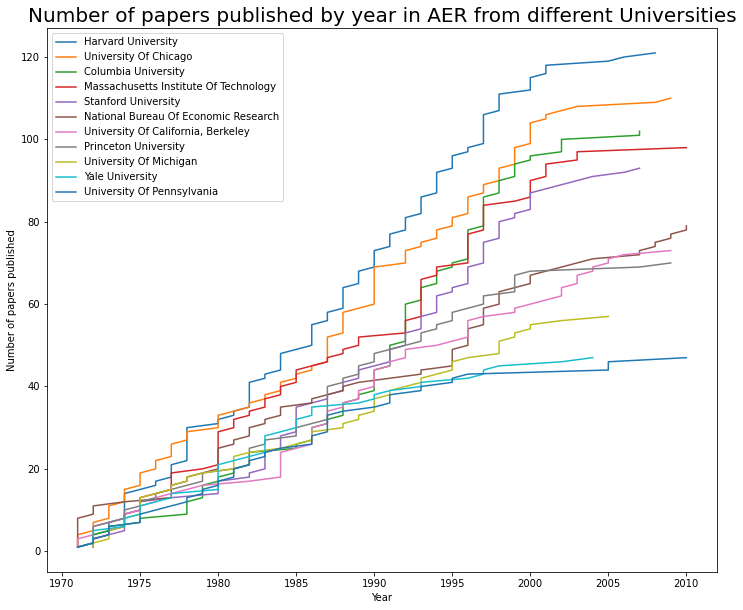

In [30]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = AER_melted_master
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])]
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])]
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])]
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])]
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])]
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])]
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])]
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])]
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])]
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])]
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])]

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in AER from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()